In [1]:
import pandas as pd
import numpy as np
from warnings import simplefilter
simplefilter(action='ignore',category=FutureWarning)  # ingnore all future warings

In [ ]:
df = pd.read_csv('/content/cleveland_heart_disease.csv',header=None) # it will not consider the 1st row as header
df.head()

In [ ]:
# Creating new column names for the dataset
df.columns=['age','sex','cp','trestbsp','chol','fbs','restecg',
            'thalach','exang','oldpeak','slope','ca','thal','target']

In [4]:
len(df.columns)

14

In [ ]:
df.head()

In [ ]:
df.isnull().sum()

In [8]:
df['target'].unique() 

array([0, 2, 1, 3, 4])

In [9]:
df['target'] = df.target.map({0:0,1:1,2:1,3:1,4:1}) # using Map function we are convert the target column values to new values
df['target'].unique()

array([0, 1])

In [10]:
df['sex'].unique() 

array([1, 0])

In [11]:
df['sex'] = df.sex.map({0:'female',1:'male'})
df['sex'].unique() 

array(['male', 'female'], dtype=object)

In [12]:
print(df['thal'].isnull().sum())
df['thal'] = df.thal.fillna(df.thal.mean())
print(df['thal'].isnull().sum())
df['ca'] = df.ca.fillna(df.ca.mean())

2
0


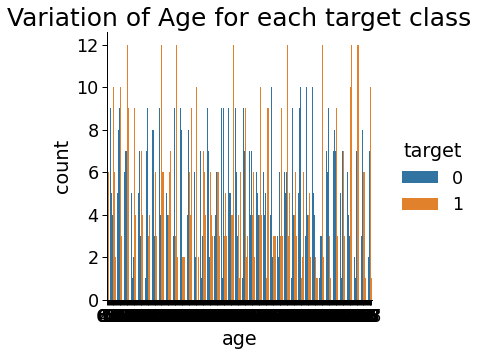

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context("paper",font_scale=2,rc={"font.size":20,"axes.titlesize":25})
sns.catplot(kind='count',data=df,x='age',hue='target',order=df['age'])
plt.title('Variation of Age for each target class')
plt.show()

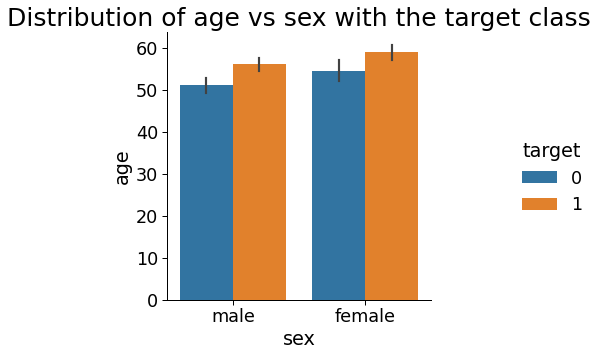

In [14]:
sns.catplot(kind='bar',data=df,y='age',x='sex',hue='target')
plt.title('Distribution of age vs sex with the target class')
plt.show()

In [15]:
df['sex']=df.sex.map({'female':0,'male':1})

In [16]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [19]:
from sklearn.preprocessing import StandardScaler as ss
model = ss()
X_train = model.fit_transform(X_train)
X_test = model.transform(X_test)

In [20]:
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression()
model_lr.fit(X_train,y_train)

LogisticRegression()

In [21]:
y_pred = model_lr.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0])

In [22]:
from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_pred,y_test)
cm_test

array([[25,  3],
       [ 4, 29]])

In [23]:
y_pred_train = model_lr.predict(X_train)

In [27]:
cm_train = confusion_matrix(y_pred_train,y_train)
cm_train

array([[121,  25],
       [ 14,  82]])

In [28]:
print('Accuracy for test set for LogisticRegression={}'.format(cm_test[0][0] + cm_train))

Accuracy for test set for LogisticRegression=[[146  50]
 [ 39 107]]


In [29]:
print('Accuracy for training set for LogisticRegression={}'.format(cm_train[0][0]))

Accuracy for training set for LogisticRegression=121


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')

In [3]:
df = pd.read_csv('/content/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df.info()

In [4]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [5]:
df.nunique()  # To know the type of variable

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [6]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [7]:
# Change the categorical type to Categorical variables(means it can accepts also textual data)
df['sex'] = df['sex'].astype('object')
df['cp'] = df['cp'].astype('object')
df['fbs'] = df['fbs'].astype('object')
df['restecg'] = df['restecg'].astype('object')
df['exang'] = df['exang'].astype('object')
df['slope'] = df['slope'].astype('object')
df['ca'] = df['ca'].astype('object')
df['thal'] = df['thal'].astype('object')
df.dtypes

age           int64
sex          object
cp           object
trestbps      int64
chol          int64
fbs          object
restecg      object
thalach       int64
exang        object
oldpeak     float64
slope        object
ca           object
thal         object
target        int64
dtype: object

In [8]:
# Check for the data characters mistakes
# Feature 'ca' ranges from 0-3, however, df.nunique() listed (0-4).So lets find the 4 and change them to 'NaN'
df['ca'].unique()

array([0, 2, 1, 3, 4], dtype=object)

In [9]:
df.ca.value_counts()

0    175
1     65
2     38
3     20
4      5
Name: ca, dtype: int64

In [10]:
df[df['ca']==4] # filtering -> ask the df give me ca=4 records

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
92,52,1,2,138,223,0,1,169,0,0.0,2,4,2,1
158,58,1,1,125,220,0,1,144,0,0.4,1,4,3,1
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
251,43,1,0,132,247,1,0,143,1,0.1,1,4,3,0


In [11]:
df.loc[df['ca']==4,'ca'] = np.NaN
# filtering -> ask the df give me location number & ca column values where ca=4
# and convert the ca values to NaN.

In [12]:
df[df['ca']==4]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target


In [13]:
df['ca'].unique()

array([0, 2, 1, 3, nan], dtype=object)

In [14]:
df.ca.value_counts()

0    175
1     65
2     38
3     20
Name: ca, dtype: int64

In [15]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          5
thal        0
target      0
dtype: int64

In [16]:
df['thal'].unique()

array([1, 2, 3, 0], dtype=object)

In [17]:
df.thal.value_counts()  
# Here 0 is not valid value for 'thal', we repeating similar steps as 'ca' for removing thal '0' records

2    166
3    117
1     18
0      2
Name: thal, dtype: int64

In [18]:
df.loc[df['thal']==0,'thal']=np.NaN

In [19]:
df.thal.value_counts()  

2    166
3    117
1     18
Name: thal, dtype: int64

In [20]:
# Check for missing values & replace them
df.isnull().sum() # These null values for ca,thal are generated by above steps.

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          5
thal        2
target      0
dtype: int64

In [21]:
df = df.fillna(df.median()) # we are replace the NaN values with Median value
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [22]:
# Check for duplicate rows & remove them.
duplicated = df.duplicated().sum()
duplicated

1

In [23]:
if duplicated:
  print('Duplicated rows in dataset are {}'.format(duplicated))
else:
  print('No Duplicate rows')

Duplicated rows in dataset are 1


In [24]:
duplicated = df[df.duplicated(keep=False)]
duplicated

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
163,38,1,2,138,175,0,1,173,0,0.0,2,0.0,2.0,1
164,38,1,2,138,175,0,1,173,0,0.0,2,0.0,2.0,1


In [25]:
df.describe() # we shd check for min and max values for your categorical data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.663366,2.326733,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,0.934375,0.583020,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,3.000000,1.000000


In [46]:
# Change the labelling for better interpretation/visualization understanding 
df['target'] = df.target.replace({1:"Disease",0:"No_disease"})
df['sex'] = df.sex.replace({1:"Male",0:"Female"})
df['cp']=df.cp.replace({1: "typical_angina",
                        2: "atypical_angina",
                        3: "non-anginal pain",
                        4: "asymtomatic"})
df['exang'] = df.exang.replace({1:"Yes",0:"No"})
df['slope'] = df.cp.replace({1: "unsloping",
                             2: "flat",
                             3:"downsloping"})
df['thal'] = df.thal.replace({1: "fixed_defect",
                              2: "reversable_defect",
                              3: "normal_defect"})

In [29]:
# to know the basic stats of the numerical data
df.describe()

,age,trestbps,chol,fbs,restecg,thalach,oldpeak,ca
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,0.148515,0.528053,149.646865,1.039604,0.663366
std,9.082101,17.538143,51.830751,0.356198,0.525860,22.905161,1.161075,0.934375
min,29.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000
25%,47.500000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000
50%,55.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.800000,0.000000
75%,61.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.600000,1.000000
max,77.000000,200.000000,564.000000,1.000000,2.000000,202.000000,6.200000,3.000000


In [30]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,Male,non-anginal pain,145,233,1,0,150,No,2.3,non-anginal pain,0.0,fixed_defect,Disease
1,37,Male,atypical_angina,130,250,0,1,187,No,3.5,atypical_angina,0.0,reversable_defect,Disease
2,41,0,typical_angina,130,204,0,0,172,No,1.4,typical_angina,0.0,reversable_defect,Disease
3,56,Male,typical_angina,120,236,0,1,178,No,0.8,typical_angina,0.0,reversable_defect,Disease
4,57,0,0,120,354,0,1,163,Yes,0.6,0,0.0,reversable_defect,Disease


In [31]:
df.describe(include='object') # gives basic statistics of the categorical data

,sex,cp,exang,slope,thal,target
count,303,303,303,303,303,303
unique,2,4,2,4,3,2
top,Male,0,No,0,reversable_defect,Disease
freq,207,143,204,143,168,165


age            AxesSubplot(0.125,0.536818;0.168478x0.343182)
trestbps    AxesSubplot(0.327174,0.536818;0.168478x0.343182)
chol        AxesSubplot(0.529348,0.536818;0.168478x0.343182)
fbs         AxesSubplot(0.731522,0.536818;0.168478x0.343182)
restecg           AxesSubplot(0.125,0.125;0.168478x0.343182)
thalach        AxesSubplot(0.327174,0.125;0.168478x0.343182)
oldpeak        AxesSubplot(0.529348,0.125;0.168478x0.343182)
ca             AxesSubplot(0.731522,0.125;0.168478x0.343182)
dtype: object

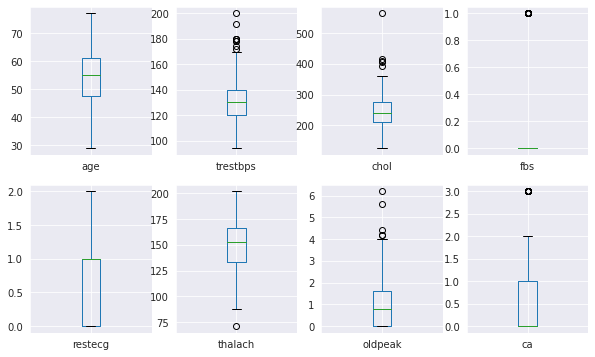

In [33]:
# EDS/Visualization on dataset
df.plot(kind='box',subplots=True,layout=(2,4),sharex=False,sharey=False,figsize=(10,6))

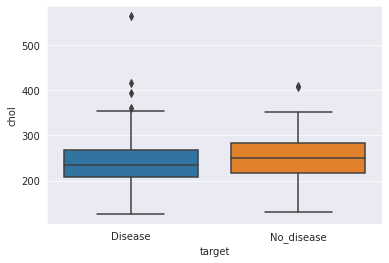

In [34]:
sns.boxplot(x='target',y='chol',data=df)

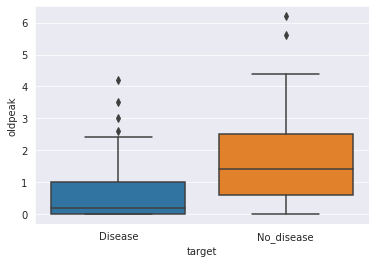

In [35]:
sns.boxplot(x='target',y='oldpeak',data=df)

In [37]:
# define continuous variable & plot
continuous_features = ['age','trestbps','chol','thalach','oldpeak']
def outliers(df_out,drop=False):
  for each_feature in df_out.columns:
    feature_data = df_out[each_feature]
    Q1 = np.percentile(feature_data,25.)
    Q3 = np.percentile(feature_data,75.)
    IQR = Q3-Q1 # Inter Quartile range
    outlier_step = IQR * 1.5
    outliers = feature_data[~((feature_data >= Q1 - outlier_step)&(feature_data <= Q3 + outlier_step))].index.tolist()
    if not drop:
      print('For the feature {}, No of Outliers is {}'.format(each_feature,len(outliers)))
    if drop:
      df.drop(outliers,inplace=True,errors='ignore')
      print('Outliers from {} feature removed'.format(each_feature))
outliers(df[continuous_features])

For the feature age, No of Outliers is 0
For the feature trestbps, No of Outliers is 9
For the feature chol, No of Outliers is 5
For the feature thalach, No of Outliers is 1
For the feature oldpeak, No of Outliers is 5


In [38]:
outliers(df[continuous_features],drop='True')

Outliers from age feature removed
Outliers from trestbps feature removed
Outliers from chol feature removed
Outliers from thalach feature removed
Outliers from oldpeak feature removed


In [39]:
outliers(df[continuous_features])

For the feature age, No of Outliers is 0
For the feature trestbps, No of Outliers is 0
For the feature chol, No of Outliers is 0
For the feature thalach, No of Outliers is 0
For the feature oldpeak, No of Outliers is 0


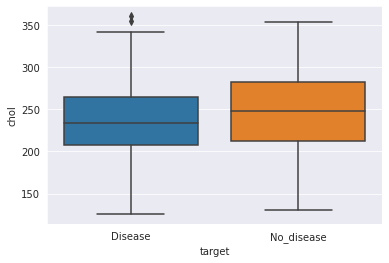

In [49]:
sns.boxplot(x='target',y='chol',data=df)

Disease       159
No_disease    125
Name: target, dtype: int64


Text(0.5, 1.0, 'Heart Disease Classes')

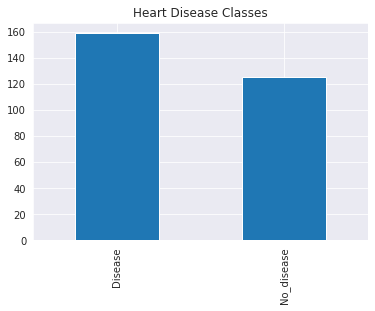

In [44]:
# Distribution & Relationship
print(df.target.value_counts())
df['target'].value_counts().plot(kind='bar').set_title('Heart Disease Classes')

Male      199
Female     85
Name: sex, dtype: int64


Text(0.5, 1.0, 'Gender details')

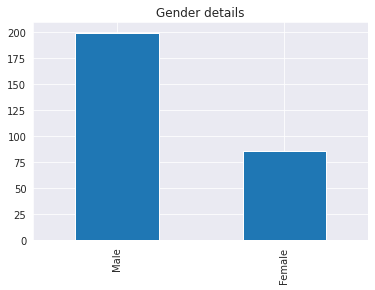

In [47]:
print(df.sex.value_counts())
df['sex'].value_counts().plot(kind='bar').set_title('Gender details')

0                   130
atypical_angina      83
typical_angina       49
non-anginal pain     22
Name: cp, dtype: int64


Text(0.5, 1.0, 'ChestPain details')

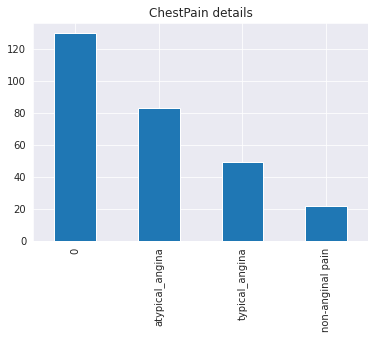

In [50]:
print(df.cp.value_counts())
df['cp'].value_counts().plot(kind='bar').set_title('ChestPain details')

1    145
0    137
2      2
Name: restecg, dtype: int64


Text(0.5, 1.0, 'RestECG details')

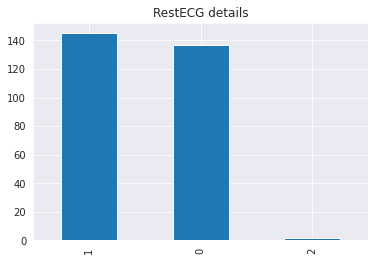

In [51]:
print(df.restecg.value_counts())
df['restecg'].value_counts().plot(kind='bar').set_title('RestECG details')

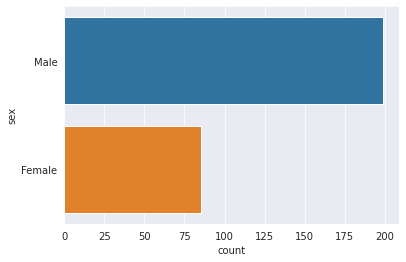

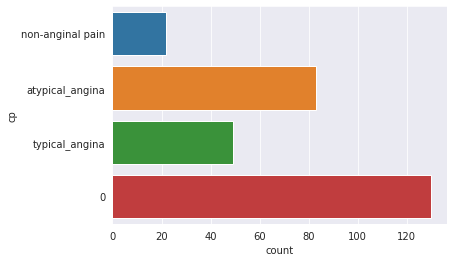

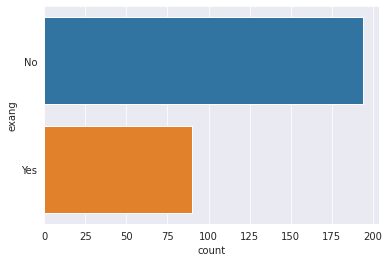

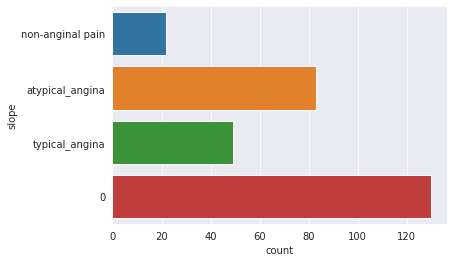

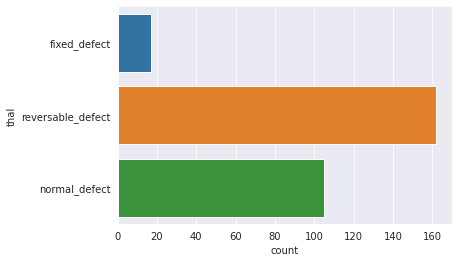

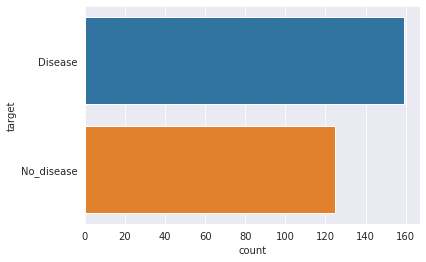

In [53]:
# Categorical data in chart with value count
for column in df.select_dtypes(include='object'):
  if df[column].nunique() < 10:
    sns.countplot(y=column,data=df)
    plt.show()

Text(0.5, 1.0, 'Disease classes according to Sex')

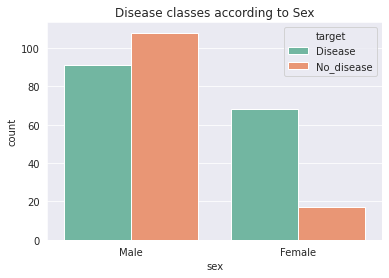

In [55]:
# Visualize categorical data distribution
sns.countplot(x='sex',hue='target',data=df,palette='Set2').set_title('Disease classes according to Sex')

Text(0.5, 1.0, 'Disease classes according to cp')

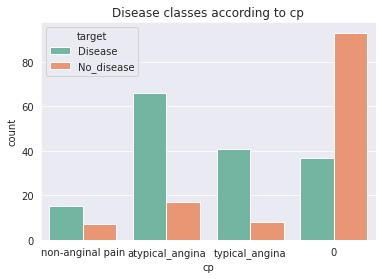

In [56]:
sns.countplot(x='cp',hue='target',data=df,palette='Set2').set_title('Disease classes according to cp')

Text(0.5, 1.0, 'Disease classes according to thal')

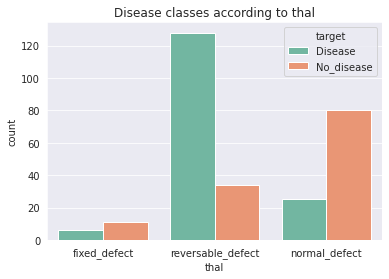

In [57]:
sns.countplot(x='thal',hue='target',data=df,palette='Set2').set_title('Disease classes according to thal')

Text(0.5, 1.0, 'Disease classes according to Exang')

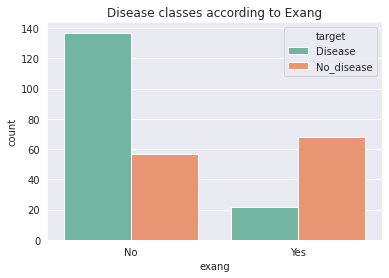

In [58]:
sns.countplot(x='exang',hue='target',data=df,palette='Set2').set_title('Disease classes according to Exang')

Text(0.5, 1.0, 'Disease classes according to FBS')

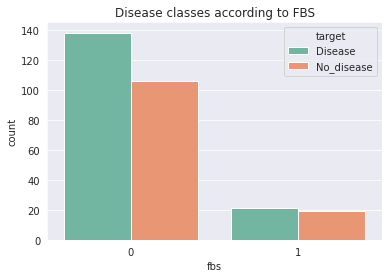

In [59]:
sns.countplot(x='fbs',hue='target',data=df,palette='Set2').set_title('Disease classes according to FBS')

Text(0.5, 1.0, 'Disease classes according to ca')

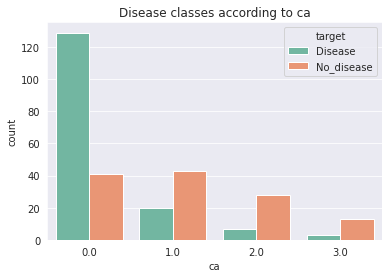

In [60]:
sns.countplot(x='ca',hue='target',data=df,palette='Set2').set_title('Disease classes according to ca')

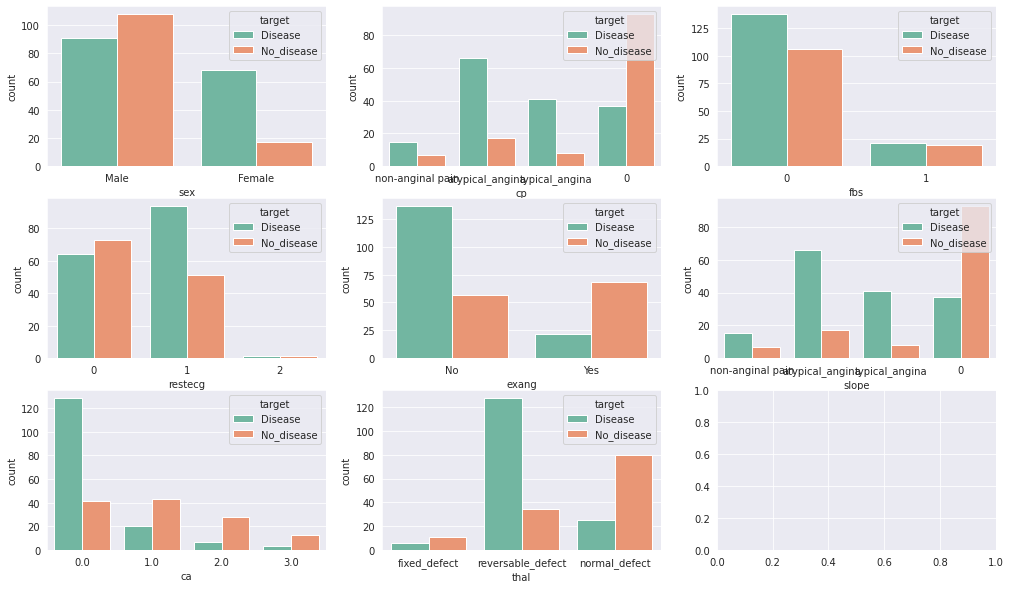

In [63]:
# Visualize all togeather
# For plotting, group categorical features in cat_feat
# To create dist in 8 feature, 9th is the target.
fig,axes = plt.subplots(nrows=3,ncols=3,figsize=(17,10))
cat_feat = ['sex','cp','fbs','restecg','exang','slope','ca','thal','target']

for idx, feature in enumerate(cat_feat):
  ax = axes[int(idx/3),idx%3]
  if feature!='target':
    sns.countplot(x=feature,hue='target',data=df,ax=ax,palette='Set2')

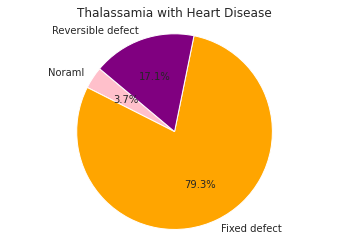

In [65]:
# Another way of visualizing: Pie charts - Thalassamia with Heart Disease
labels = 'Noraml','Fixed defect','Reversible defect'
sizes = [6, 130, 28]
colors = ['pink','orange','purple']
plt.pie(sizes,labels=labels,colors=colors,autopct='%.1f%%',startangle=140)
plt.axis('equal')
plt.title('Thalassamia with Heart Disease')
plt.show()

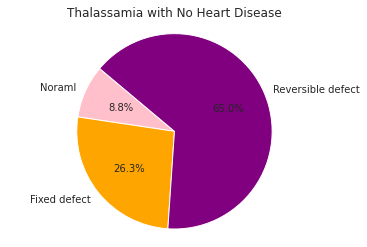

In [67]:
# Thalassamia with No Heart Disease
labels = 'Noraml','Fixed defect','Reversible defect'
sizes = [12, 36, 89]
colors = ['pink','orange','purple']
plt.pie(sizes,labels=labels,colors=colors,autopct='%.1f%%',startangle=140)
plt.axis('equal')
plt.title('Thalassamia with No Heart Disease')
plt.show()

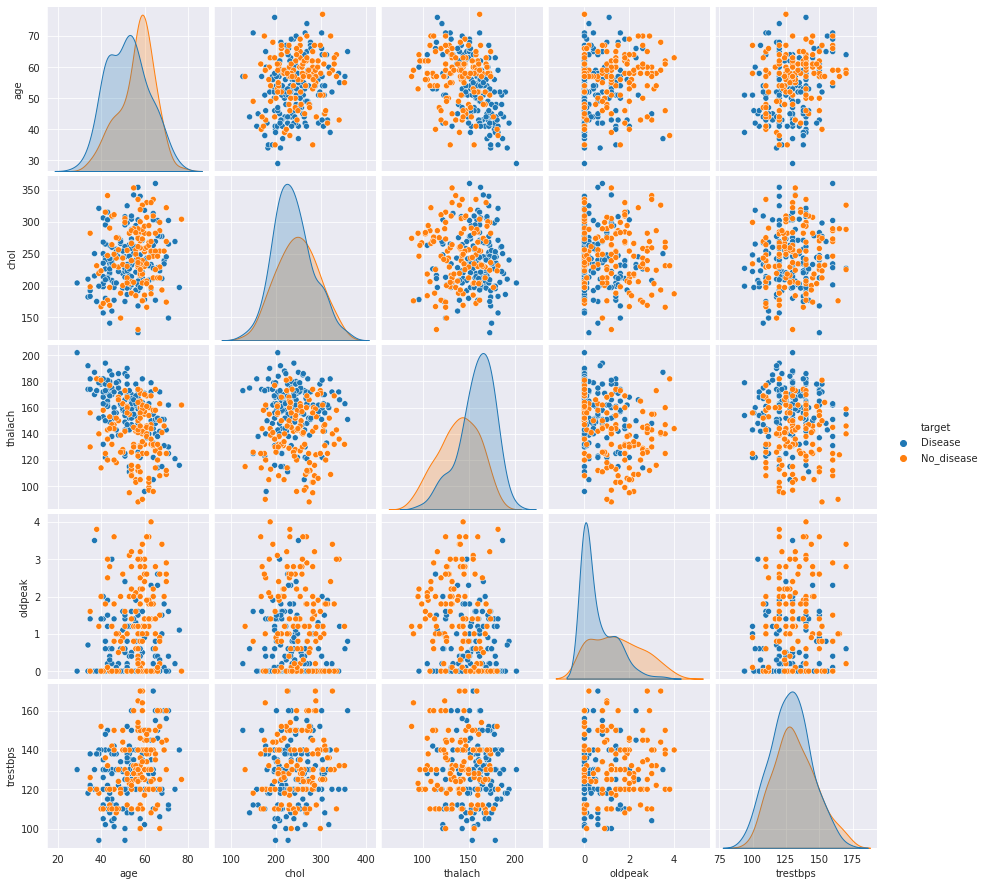

In [68]:
# Visualize the distribution of continuous variable across target variable
# Define continuous variable and plot
continuous_features = ['age','chol','thalach','oldpeak','trestbps']
sns.pairplot(df[continuous_features + ['target']],hue='target')

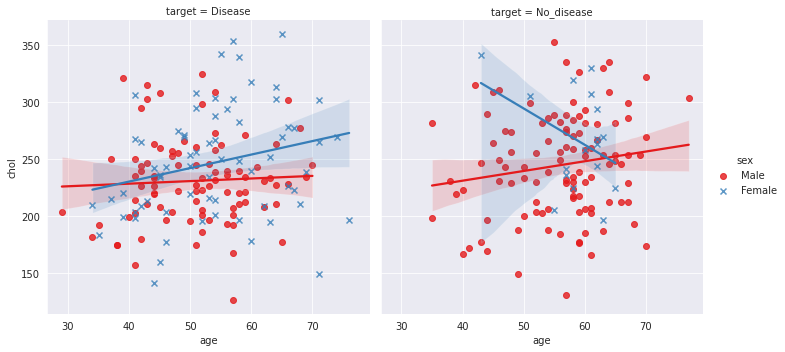

In [69]:
# To understand the relationship between age and chol in each of the target based on sex
sns.lmplot(x='age',y='chol',hue='sex',col='target',
           markers=["o","x"],
           palette='Set1',
           data=df)
plt.show()

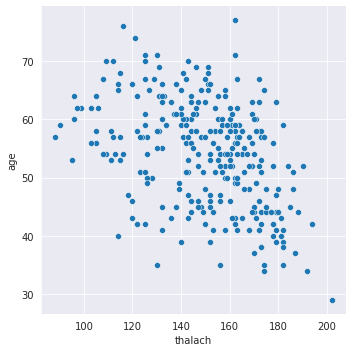

In [70]:
# Relation plot
sns.relplot(x='thalach',y='age',data=df)

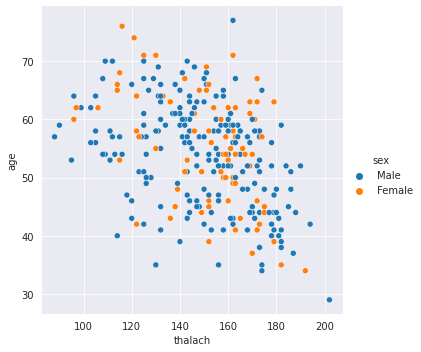

In [71]:
sns.relplot(x='thalach',y='age',data=df, hue='sex')

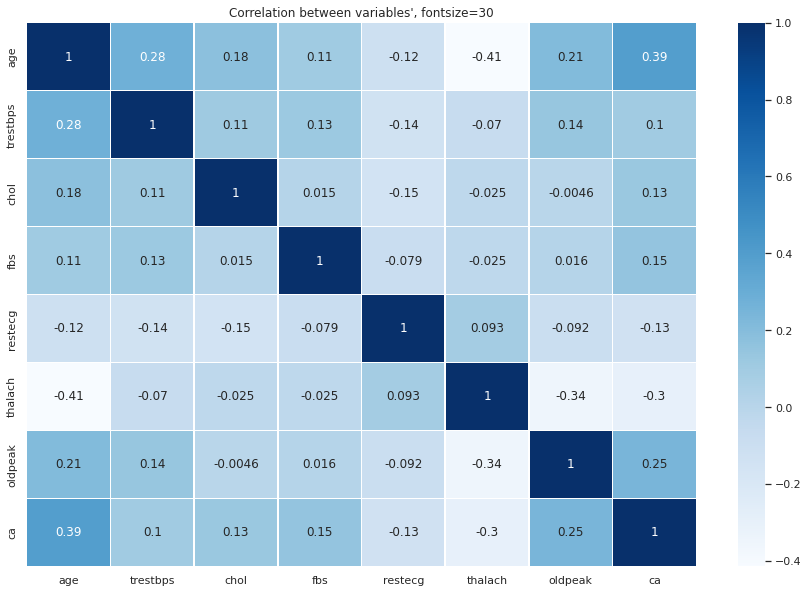

In [73]:
# The correlations
sns.set(style='white')
plt.rcParams['figure.figsize']=(15,10)
sns.heatmap(df.corr(),annot=True,linewidths=.5,cmap="Blues")
plt.title("Correlation between variables', fontsize=30")
plt.show()

In [74]:
df.corr()

,age,trestbps,chol,fbs,restecg,thalach,oldpeak,ca
age,1.000000,0.277741,0.178688,0.108777,-0.115474,-0.414400,0.213528,0.394023
trestbps,0.277741,1.000000,0.111825,0.126368,-0.137224,-0.069547,0.142423,0.099606
chol,0.178688,0.111825,1.000000,0.015158,-0.146415,-0.025388,-0.004568,0.127936
fbs,0.108777,0.126368,0.015158,1.000000,-0.078602,-0.024885,0.016368,0.151385
restecg,-0.115474,-0.137224,-0.146415,-0.078602,1.000000,0.092574,-0.092015,-0.128830
thalach,-0.414400,-0.069547,-0.025388,-0.024885,0.092574,1.000000,-0.343370,-0.298208
oldpeak,0.213528,0.142423,-0.004568,0.016368,-0.092015,-0.343370,1.000000,0.247039
ca,0.394023,0.099606,0.127936,0.151385,-0.128830,-0.298208,0.247039,1.000000


Text(0.5, 1.0, 'Age Distribution')

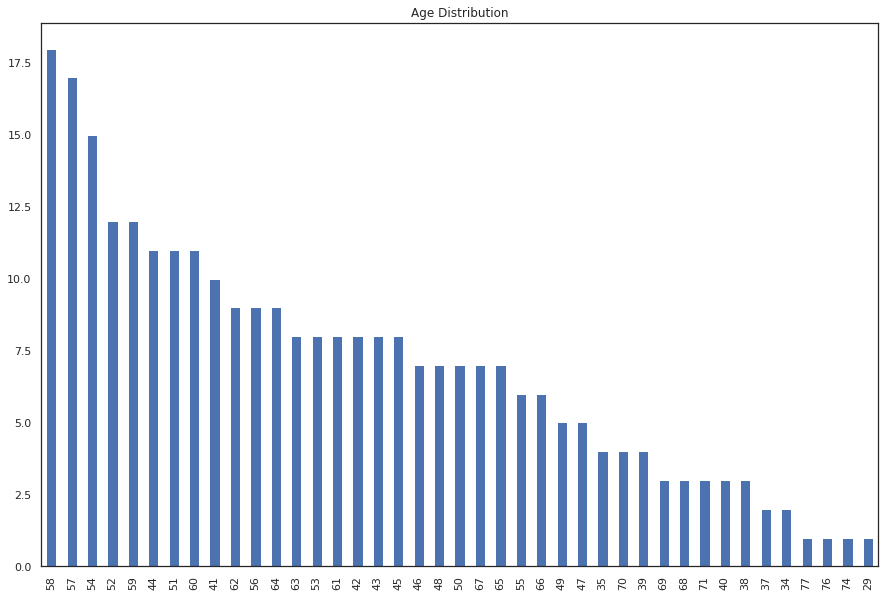

In [75]:
df['age'].value_counts().plot(kind='bar').set_title('Age Distribution')

58    18
57    17
54    15
52    12
59    12
44    11
51    11
60    11
41    10
62     9
Name: age, dtype: int64


Text(0, 0.5, 'Age Distribution')

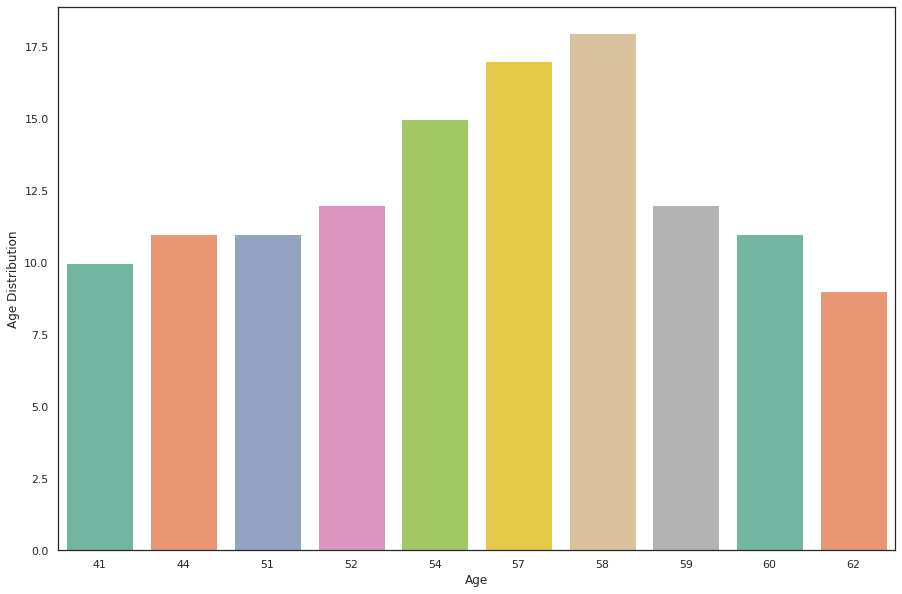

In [80]:
# Analyse the distribution in age in range 10
print(df.age.value_counts()[:10])
sns.barplot(x=df.age.value_counts()[:10].index,
y=df.age.value_counts()[:10].values,
palette='Set2')
plt.xlabel('Age')
plt.ylabel("Age Distribution")

In [81]:
# Most of the patients are in the age between 50s and 60s
# To know the youngest and oldest in age
print(min(df.age))
print(max(df.age))
print(df.age.mean())

29
77
53.99295774647887


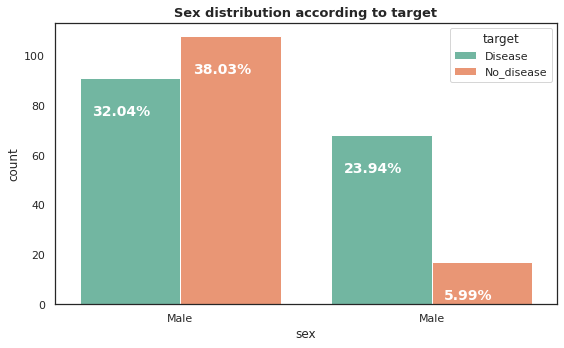

In [87]:
# Gender distribution vs Target
fig,ax = plt.subplots(figsize=(8,5))
name = df['sex']
ax = sns.countplot(x='sex',hue='target',data=df,palette='Set2')
ax.set_title("Sex distribution according to target",fontsize=13,weight='bold')
ax.set_xticklabels(name,rotation=0)

totals = []
for i in ax.patches:
  totals.append(i.get_height())
total = sum(totals)
for i in ax.patches:
  ax.text(i.get_x()+.05,i.get_height()-15,
  str(round((i.get_height()/total)*100,2)) + '%', fontsize=14,color='white',weight='bold')
plt.tight_layout()

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('/content/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
data = df
print("(Rows,Columns): " + str(data.shape))

(Rows,Columns): (303, 14)


In [7]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [8]:
data.nunique(axis=0)

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [ ]:
print(data.isna().sum())

In [11]:
data['target'].value_counts()
# 1 = Diseased & 0 = Not Diseased
# When we get the value count of 2 parameters values are near by then we call the data as balanced
# If the  2 parameter values are not very close but they have large gap then the data is imbalanced.
# Balanced data = We go with Accuracy in classification_report method
# Imbalenced data = we go with Precision in classification_report method

1    165
0    138
Name: target, dtype: int64

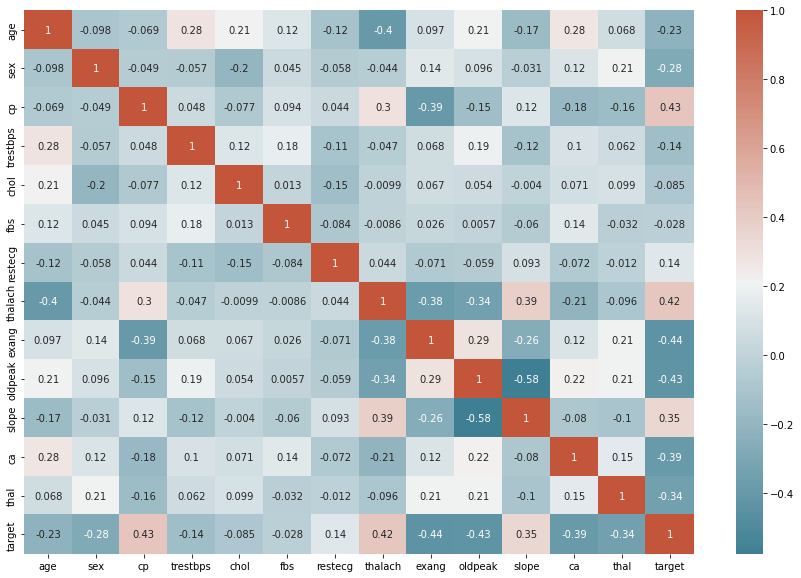

In [14]:
# Caluculate Correlation Matrix
corr = data.corr()
plt.subplots(figsize=(15,10))
sns.heatmap(corr,xticklabels=corr.columns,
            yticklabels=corr.columns,
            annot=True,
            cmap=sns.diverging_palette(220,20,as_cmap=True))

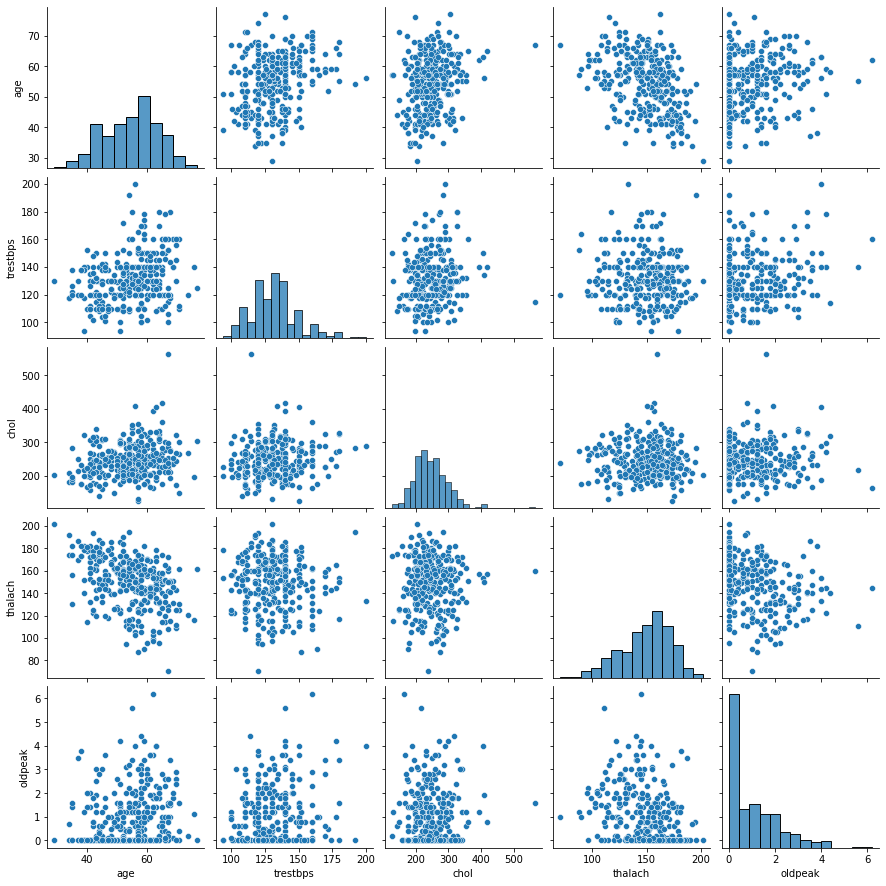

In [15]:
subData = data[['age','trestbps','chol','thalach','oldpeak']]
sns.pairplot(subData)
# Taking only numeric columns for pair plot

In [16]:
# Filter data by Possitive heart disease patient
pos_data = data[data['target']==1]
pos_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.0
mean,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.121212,1.0
std,9.550651,0.497444,0.952222,16.169613,53.552872,0.347412,0.504818,19.174276,0.347412,0.780683,0.593635,0.848894,0.465752,0.0
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,96.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,44.000000,0.000000,1.000000,120.000000,208.000000,0.000000,0.000000,149.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.0
50%,52.000000,1.000000,2.000000,130.000000,234.000000,0.000000,1.000000,161.000000,0.000000,0.200000,2.000000,0.000000,2.000000,1.0
75%,59.000000,1.000000,2.000000,140.000000,267.000000,0.000000,1.000000,172.000000,0.000000,1.000000,2.000000,0.000000,2.000000,1.0
max,76.000000,1.000000,3.000000,180.000000,564.000000,1.000000,2.000000,202.000000,1.000000,4.200000,2.000000,4.000000,3.000000,1.0


In [18]:
# Filter data by Negative heart disease patient
neg_data = data[data['target']==0]
neg_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.0
mean,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478,0.0
std,7.962082,0.380416,0.905920,18.729944,49.454614,0.367401,0.541321,22.598782,0.499232,1.300340,0.561324,1.043460,0.684762,0.0
min,35.000000,0.000000,0.000000,100.000000,131.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,52.000000,1.000000,0.000000,120.000000,217.250000,0.000000,0.000000,125.000000,0.000000,0.600000,1.000000,0.000000,2.000000,0.0
50%,58.000000,1.000000,0.000000,130.000000,249.000000,0.000000,0.000000,142.000000,1.000000,1.400000,1.000000,1.000000,3.000000,0.0
75%,62.000000,1.000000,0.000000,144.750000,283.000000,0.000000,1.000000,156.000000,1.000000,2.500000,1.750000,2.000000,3.000000,0.0
max,77.000000,1.000000,3.000000,200.000000,409.000000,1.000000,2.000000,195.000000,1.000000,6.200000,2.000000,4.000000,3.000000,0.0


In [21]:
print("(Positive Patients ST depression): " + str(pos_data['oldpeak'].mean()))
print("(Negative Patients ST depression): " + str(neg_data['oldpeak'].mean()))

(Positive Patients ST depression): 0.5830303030303029
(Negative Patients ST depression): 1.5855072463768118


In [22]:
print("(Positive Patients thalach): " + str(pos_data['thalach'].mean()))
print("(Negative Patients thalach): " + str(neg_data['thalach'].mean()))

(Positive Patients thalach): 158.46666666666667
(Negative Patients thalach): 139.1014492753623


In [28]:
# Modelling
X = data.iloc[:,:-1].values
y = data.iloc[:,-1].values
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

model1 = LogisticRegression(random_state=1)
model1.fit(X_train,y_train)

y_pred1 = model1.predict(X_test)
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61

